# Linear regression -Multiple variable

In [3]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
#do plotting inline instead of in a seperate window.
%matplotlib inline


In [4]:
df = pd.read_csv("C:\\Users\\dhala\\Desktop\\Coursera\\ML-1\\ex1\\ex1data2.txt",names=['Size','Bedrooms','Price'])
df.shape
df.head(2)


,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900


### Plotting using dataframe built-in library

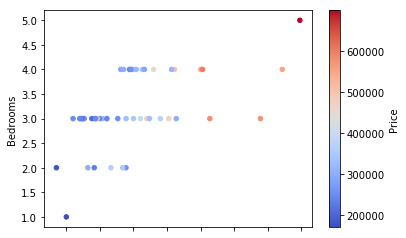

In [5]:
df.plot.scatter(x='Size',y='Bedrooms',c='Price',cmap='coolwarm')

### Plotting using matplotlib

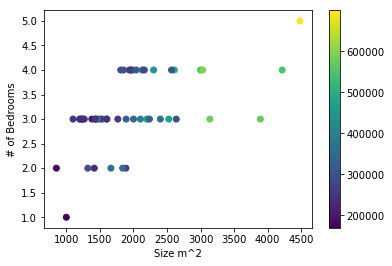

In [6]:
#Pass data to a matrix
x = df.as_matrix(columns = ['Size','Bedrooms'])
y = df.as_matrix(columns = ['Price'])
#plt.tricontour(x[:,0],x[:,1],y[:,0],colors='k')
plt.scatter(df['Size'],df['Bedrooms'],c=y)
plt.xlabel('Size m^2')
plt.ylabel('# of Bedrooms')
plt.colorbar()
plt.show()

In [7]:
df = (df - df.mean()) / df.std()
df.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


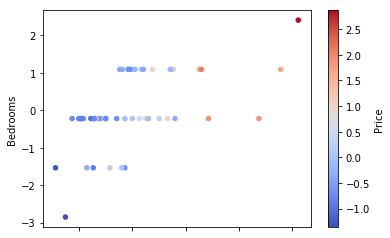

In [26]:
df['Name'] = 1
data = {'bias':df['Name'],'Size':df['Size'],'Bedrooms':df['Bedrooms'],'Price':df['Price']}
df = pd.DataFrame(data)
X = df.as_matrix(columns = ['bias','Size','Bedrooms'])
y = df.as_matrix(columns = ['Price'])
df.plot.scatter(x='Size',y='Bedrooms',c='Price',cmap='coolwarm')

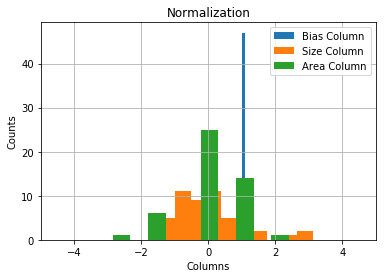

In [9]:
plt.grid(True)
plt.xlim([-5,5])
dummy = plt.hist(df['bias'],label = 'Bias Column')
dummy = plt.hist(df['Size'],label = 'Size Column')
dummy = plt.hist(df['Bedrooms'],label = 'Area Column')
plt.title('Normalization')
plt.xlabel('Columns')
plt.ylabel('Counts')
dummy = plt.legend()

In [10]:
initial_theta = np.zeros((X.shape[1],1))
theta = np.matrix(np.array([0,0,0]))
print(initial_theta)
print(theta)


[[ 0.]
 [ 0.]
 [ 0.]]
[[0 0 0]]


In [11]:
def h(X,Theta):
    return np.dot(X,Theta)


In [12]:
def computeCost(X, y, Theta):
    m = len(y)
    err = ( h(X, Theta) - y)
    return (1.0 / (2.0 * m)) * (np.dot(err.T,err))

In [13]:
def computeCost1(X, y, Theta):
    inner = np.power(((X * Theta.T) - y), 2) #compute for each element in X
    return np.sum(inner) / (2 * len(X))

In [39]:
print(computeCost(X, y, initial_theta))
#print(computeCost1(X, y, theta))

[[ 0.4893617]]


In [46]:
def gradientDescent(X, y,Theta, num_iters=1500):
    alpha=0.01
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = np.dot(X,Theta)
        Theta = Theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[iter] = computeCost(X, y, Theta)
    return(Theta, J_history)

In [47]:
NewTheta , Cost_J = gradientDescent(X, y,initial_theta)

In [48]:
print(NewTheta)
print(Cost_J)


[[ -9.92704736e-17]
 [  8.84042349e-01]
 [ -5.24551809e-02]]
[ 0.4805491   0.47198588  0.46366462 ...,  0.13068671  0.13068671
  0.13068671]


<function matplotlib.pyplot.show>

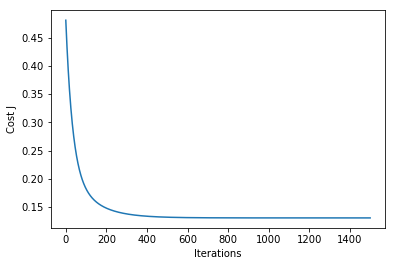

In [49]:
plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');
plt.show

In [50]:
print(computeCost(X, y, NewTheta))

[[ 0.13068671]]
